## 多变量线性回归

**案例**: 根据房子面积和房子和房子价格进行预测  
数据：ex1data2.txt

特别：分别绘制进行特征缩放的回归，和不进行特征缩放的回归

#### 1. 导入需要的库

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

#### 2. 读取数据

In [2]:
data = pd.read_csv('ex1data2.txt', sep=',', names=["area", "bedrooms", "price"])
data.head()

,area,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [ ]:
# 绘制三维散点图
%matplotlib notebook    
# 使得画出的3d图像可以在jupyter notebook中如果进行交互
# %matplotlib inline
fig = plt.figure()
ax = Axes3D(fig)
fig.add_axes(ax)
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2])
ax.set_xlabel('area')
ax.set_ylabel('bedrooms')
ax.set_zlabel('price')
plt.show()

<IPython.core.display.Javascript object>

#### 3. 处理数据（特征缩放X1, 无特征缩放X2）

In [4]:
# data.insert(loc=0, column='b', value=1)
# 需要后面再插入，避免出现signal=0的情况

In [5]:
# 定义特征缩放函数
def normalize_feature(data):
    """
    Args:
    data(ndarray)
    
    Return:
    (new_data, mean, signal): 标志化后的数据，平均值，标志差
    """
    # axis=0 代表列，axis=1代表行
    mean = np.mean(data, axis=0)
    signal = np.std(data, axis=0)
    new_data = (data - mean) / signal
    return new_data, mean, signal

In [6]:
X1 = data.iloc[:, 0:2].values
X2 = data.iloc[:, 0:2].values
Y = data.iloc[:, 2].values
Y = Y.reshape(47,1)
# 对X1进行特征缩放
X1, mean1, signal1 = normalize_feature(X1)
# axis = 1代表在列上插入，axis=0代表行上插入
X1 = np.insert(X1, 0, 1, axis=1)

函数`np.insert(arr, obj, values, axis)`  
arr：要进行插入操作的ndarray数组。

obj：插入位置的索引或索引数组。

values：要插入的值。

axis：插入的轴向，默认为None，表示将输入数组展开插入。

#### 4. 迭代处理

处理的函数：  
Y = $w_1\times X_1 + w_2 \times X_2 + b$  
    
      
      
  
需要构造的数据矩阵（使用向量化）  
$$ X=\begin{bmatrix}
         1&x^{(1)}_1&x^{(1)}_2\\
         1& x^{(2)}_1&x^{(2)}_2\\
        \vdots&\vdots&\vdots\\
         1&x^{(m)}_1&x^{(m)}_2\\
     \end{bmatrix}
$$  
  
  
$$
    \theta=\begin{bmatrix}
            b & w_1 & w_2
         \end{bmatrix}
$$
  
  
$$
    Y=\begin{bmatrix}
        y^{(1)}\\
        y^{(2)}\\
        \vdots\\
        y^{(m)}
     \end{bmatrix}
$$

公式1：  
$$
J = \frac{1}{2m}\times \Sigma((X@\theta-Y)^2)
$$  
**说明:** 平方是对矩阵每个元素平方，不是矩阵乘以自身，求和是对矩阵每个元素进行求和  
  
  
公式2：   

$$
    \theta = \theta - \frac{\alpha}{m} \times X^T@(X@\theta - Y)
$$  
$\theta$ 在该题中为   
$$
\theta = \begin{bmatrix}
        b\\
        w_1\\
        w_2
       \end{bmatrix}
$$

In [7]:
# 定义损失函数，和梯度函数
def cost_J_Function(X, Y, theta):
    matrix = X @ theta - Y
    matrix = np.power(matrix, 2)
    return np.sum(matrix) / (2 * len(X))

# 单次梯度下降
def gradient_function(X, Y, theta, alpha):
    theta = theta - (alpha / len(X)) * (X.T @ (X @ theta - Y))
    return theta

# 进行迭代
def gradient_descent(X, Y, theta, alpha, iters):
    history_cost_J = []
    history_theta = []
    for i in range(iters):
        J = cost_J_Function(X, Y, theta)
        history_cost_J.append(J)
        history_theta.append(theta)
        theta = gradient_function(X, Y, theta, alpha)
        if i % 100 == 0:
            print(J)
    
    return theta, history_cost_J, history_theta

In [8]:
alpha = [0.02, 0.002, 0.001]
iters = 2000
theta1 = np.array([[0], [0], [0]])

**注意:** 使用pandas的mean()与std()函数与np的mean()与std()是有精度差的

<IPython.core.display.Javascript object>


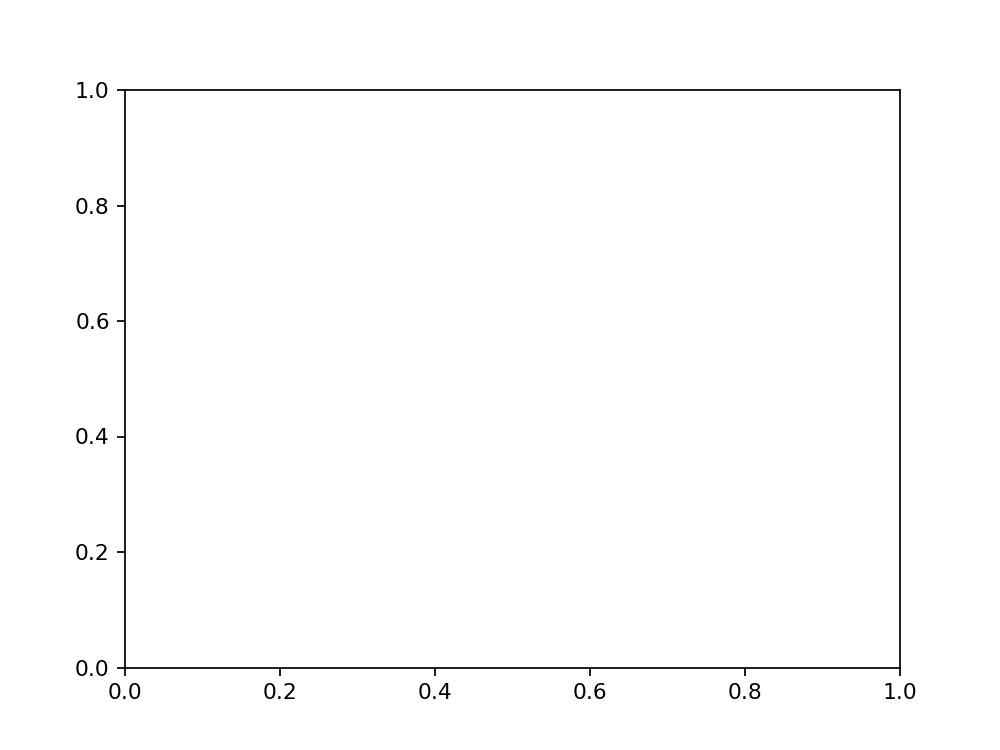

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [9]:
# 得到结果
fig, ax = plt.subplots()
for alpha1 in alpha:
    theta, cost_his , theta_his = gradient_descent(X1, Y, theta1, alpha, iters)
    ax.plot(np.arange(iters), cost_his, b='r')
    ax.set(title=f"alpha = {alpha1}")
plt.show()